# 1. Dataset

We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

1. Click "+ Add Data" in the top right corner of this Kaggle notebook.
1. Search "Google Play" in the search box.
1. Click Add on the first record (uploaded by Lavanda Gupta).
1. There will be a new folder in /kaggle/input/ containing the dataset.


Jupyter Magic Commands:
You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell: 
 
    !ls -la


In [1]:
!pwd

/kaggle/working



## Importing libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [107]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")


# 3. Data transformations

Let's apply some of the transformation that we went through in the basic workshop.

In [108]:
def size_to_int(n):
    lastchar = n[-1:]
    if 'M' == lastchar:
        n = float(n[:-1])*1000
    elif 'k' == lastchar:
        n = float(n[:-1])
    else:
        n = None
    return n

In [109]:
#We drop duplicates and columns that are not relevant for our analysys, also a corrupted sample.
df_apps = df_apps.drop_duplicates()\
    .drop(["Android Ver", "Current Ver"], axis=1)\
    .drop(10472).reset_index().drop("index", axis=1)

#We perform some string operations to allow us to make the casting: 
df_apps['Size'] = df_apps['Size'].apply(size_to_int)
df_apps['Installs'] = df_apps['Installs'].str.replace('+', '')
df_apps['Installs'] = df_apps['Installs'].str.replace(',', '')
df_apps['Price'] = df_apps['Price'].str.replace('$', '')

#Casting
df_apps = df_apps.astype({'Reviews': 'int32',
                          'Installs': 'int32',
                          'Price': 'float64',
                          'Last Updated':'datetime64'})

In [110]:
#Let's take a peek
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20


In [111]:
df_apps['Genres'].str.split(';')

0                      [Art & Design]
1        [Art & Design, Pretend Play]
2                      [Art & Design]
3                      [Art & Design]
4          [Art & Design, Creativity]
                     ...             
10352                     [Education]
10353                     [Education]
10354                       [Medical]
10355             [Books & Reference]
10356                     [Lifestyle]
Name: Genres, Length: 10357, dtype: object

In [112]:
for column in df_apps.columns:
    print("In column "+column+": "+ str(df_apps[column].nunique()) + " unique values.")

In column App: 9659 unique values.
In column Category: 33 unique values.
In column Rating: 39 unique values.
In column Reviews: 6001 unique values.
In column Size: 459 unique values.
In column Installs: 20 unique values.
In column Type: 2 unique values.
In column Price: 92 unique values.
In column Content Rating: 6 unique values.
In column Genres: 119 unique values.
In column Last Updated: 1377 unique values.


# 4. Reviews dataset

Until now we have only worked with the apps dataset, and we have not taken a look at the reviews one. Let's go into it a bit.

In [113]:
df_reviews.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [114]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


We see that approximately half of the samples are completely empty of content. These entries are not useful for us at all.  

In [115]:
#Let's drop the samples with null (in this case we don't care where the nulls are, since it seems that they all are null at the same time)

df_reviews = df_reviews.dropna()

In [116]:
df_reviews.App.nunique()

865

In [117]:
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [118]:
# Exercise: Let's apply a lambda function that counts the words in the review and save it in a new column called "Word_Count".
df_reviews['Word_Count'] = df_reviews['Translated_Review'].apply(lambda x : len(x.split(' ')))

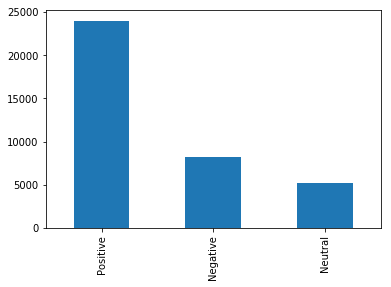

In [119]:
# Exercise: Plot in a bar chart the count for each Sentiment category in the reviews dataset.
df_reviews.Sentiment.value_counts().plot(kind='bar')

In [120]:
#Let's check for duplicates
df_reviews[df_reviews.duplicated()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Word_Count
78,10 Best Foods for You,Good,Positive,0.700000,0.600000,1
79,10 Best Foods for You,Good,Positive,0.700000,0.600000,1
100,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,21
101,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,7
103,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,6
...,...,...,...,...,...,...
64071,Hotels.com: Book Hotel Rooms & Find Vacation D...,Made account using Google account. No option G...,Negative,-0.500000,0.500000,36
64073,Hotels.com: Book Hotel Rooms & Find Vacation D...,The new system showing Top 10 whole search res...,Negative,-0.032727,0.670909,26
64075,Hotels.com: Book Hotel Rooms & Find Vacation D...,Mobile currently crashing. Their international...,Neutral,0.000000,0.200000,8
64113,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Good,Positive,0.700000,0.600000,1


In [121]:
#Let's assume that we can have duplicate entries if they have small Word_Count. Things like "good app", or "I am satisfied", should be allowed as duplicates. 
# On the other hand, let's also assume that Reviews of more than 3 words 
# have very small chance of being exactly repeated. "Works great especially going grocery store" for instance. So we need to drop these duplicates... but how?

#For now let's save the duplicates in another dataframe, and we will find some use for it later on.
df_reviews_duplicated = df_reviews[(df_reviews.duplicated()) & (df_reviews['Word_Count'] > 3)]

In [122]:
df_reviews.drop("Translated_Review", axis=1)

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Word_Count
0,10 Best Foods for You,Positive,1.000000,0.533333,21
1,10 Best Foods for You,Positive,0.250000,0.288462,7
3,10 Best Foods for You,Positive,0.400000,0.875000,6
4,10 Best Foods for You,Positive,1.000000,0.300000,3
5,10 Best Foods for You,Positive,1.000000,0.300000,2
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667,22
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222,29
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000,15
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000,15


# 5. Advanced data transformations

**Joining different datasets**

Usually, a data scientist needs to work with different sources of data, and combine it in a way that gathers the most efficient source of information into a single sample. In our case, we have 2 tables that we can try join.

One issue with this though, is that both datasets seem to be very dispaired in terms of content. We have around 10K different apps in the apps dataset, but only around 800 of them have entries in the reviews dataset. That would mean that 92% of our apps don't have any correspondance in the reviews dataset.

Let's try different joins for the sake of experimenting, and we will see what's the use of it.

In [123]:
df_apps['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10352                                     Sya9a Maroc - FR
10353                     Fr. Mike Schmitz Audio Teachings
10354                               Parkinson Exercices FR
10355                        The SCP Foundation DB fr nn5n
10356        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10357, dtype: object

In [124]:
df_reviews['App']

0                 10 Best Foods for You
1                 10 Best Foods for You
3                 10 Best Foods for You
4                 10 Best Foods for You
5                 10 Best Foods for You
                      ...              
64222    Housing-Real Estate & Property
64223    Housing-Real Estate & Property
64226    Housing-Real Estate & Property
64227    Housing-Real Estate & Property
64230    Housing-Real Estate & Property
Name: App, Length: 37427, dtype: object

In [125]:
#Left join.

df_left = df_apps.merge(right=df_reviews,
              how='left',
              left_on='App', 
              right_on='App')

In [126]:
#Right join.
df_right = df_apps.merge(right=df_reviews,
              how='right',
              left_on='App', 
              right_on='App')

In [127]:
#Inner join.
df_inner = df_apps.merge(right=df_reviews,
              how='inner',
              left_on='App', 
              right_on='App')

In [128]:
df_reviews_duplicated_keep = df_reviews_duplicated.drop_duplicates()

In [129]:
df_reviews_duplicated = df_reviews_duplicated.merge(right=df_reviews_duplicated_keep, how='outer', indicator=True)

In [130]:
df_reviews_duplicated[df_reviews_duplicated['_merge']=='left_only']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Word_Count,_merge


In [131]:
df_reviews_duplicated['_merge'].value_counts()

both          6728
right_only       0
left_only        0
Name: _merge, dtype: int64

**Dealing with NULL values**

Computers cannot deal with NaN when trying to find patters. We need to somehow eliminate these NaN.

In [132]:
df_apps.mode().iloc[0]

App                            ROBLOX
Category                       FAMILY
Rating                            4.4
Reviews                             0
Size                            11000
Installs                      1000000
Type                             Free
Price                               0
Content Rating               Everyone
Genres                          Tools
Last Updated      2018-08-03 00:00:00
Name: 0, dtype: object

In [133]:
df_apps['Rating'] = df_apps['Rating'].fillna(df_apps['Rating'].mean())

In [134]:
df_apps['Size'] = df_apps['Size'].fillna(df_apps['Size'].mean())

In [135]:
#Exercise: Fill up the 'Type' missing value with the most common category. 
#Assume that you are not going to look at this manually and could be dinamically changed based on the data.
df_apps['Type'] = df_apps['Type'].fillna(df_apps['Type'].mode()[0])

In [136]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 11 columns):
App               10357 non-null object
Category          10357 non-null object
Rating            10357 non-null float64
Reviews           10357 non-null int32
Size              10357 non-null float64
Installs          10357 non-null int32
Type              10357 non-null object
Price             10357 non-null float64
Content Rating    10357 non-null object
Genres            10357 non-null object
Last Updated      10357 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 809.3+ KB


In [137]:
df_apps['Type'].value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

**One-hot Encoding**

As we probably all know, computers are able to understand binary code, or numbers. We have an issue with some of our columns, if we want to prepare our data to be consumed by a ML algorithm. Let's inspect the dataframe and discuss what could be the issue.

In [138]:
df_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.500000,38,53000.000000,5000,Free,0.0,Everyone,Education,2017-07-25
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600.000000,100,Free,0.0,Everyone,Education,2018-07-06
10354,Parkinson Exercices FR,MEDICAL,4.187877,3,9500.000000,1000,Free,0.0,Everyone,Medical,2017-01-20
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,21287.788303,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [139]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 11 columns):
App               10357 non-null object
Category          10357 non-null object
Rating            10357 non-null float64
Reviews           10357 non-null int32
Size              10357 non-null float64
Installs          10357 non-null int32
Type              10357 non-null object
Price             10357 non-null float64
Content Rating    10357 non-null object
Genres            10357 non-null object
Last Updated      10357 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 809.3+ KB


In [140]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [141]:
ohe.fit(df_apps[['Type']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [142]:
ohe.transform(df_apps[['Type']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [143]:
df_apps = pd.concat([df_apps,
                     pd.DataFrame(ohe.transform(df_apps[['Type']]), columns=ohe.categories_[0])], axis=1)\
    .drop('Type', axis=1)

In [144]:
#Free and Paid are 100% correlated. When we hot encode, we can always drop one of the resulting columns, since it's going to be a linear function of the other columns.
df_apps.corr()

,Rating,Reviews,Size,Installs,Price,Free,Paid
Rating,1.000000,0.068604,0.073411,0.050755,-0.020600,-0.034423,0.034423
Reviews,0.068604,1.000000,0.130486,0.634997,-0.009417,0.041262,-0.041262
Size,0.073411,0.130486,1.000000,0.082693,-0.023755,0.026513,-0.026513
Installs,0.050755,0.634997,0.082693,1.000000,-0.011147,0.049513,-0.049513
Price,-0.020600,-0.009417,-0.023755,-0.011147,1.000000,-0.224234,0.224234
Free,-0.034423,0.041262,0.026513,0.049513,-0.224234,1.000000,-1.000000
Paid,0.034423,-0.041262,-0.026513,-0.049513,0.224234,-1.000000,1.000000


In [145]:
#Exercise: Convert the "Content Rating" column a One-Hot vector set of columns.
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_apps[['Content Rating']])
df_apps = pd.concat([df_apps,
                     pd.DataFrame(ohe.transform(df_apps[['Content Rating']]), columns=ohe.categories_[0])], axis=1)\
    .drop(['Content Rating',ohe.categories_[0][-1]], axis=1)

**Multi Label Binarizer**

Sometimes we get more information in our columns than we even see. If we check the column "Genres" we see that it includes a series of categories separated by ";". As it is right now, it's of no use for us, but, can we do something about it? This is where the Multi Label Binarizer comes.

In [146]:
from sklearn.preprocessing import MultiLabelBinarizer

In [147]:
binarizer = MultiLabelBinarizer()
binarizer.fit(df_apps['Genres'].str.split(';'))

MultiLabelBinarizer(classes=None, sparse_output=False)

In [148]:
df_genres_binarized = pd.DataFrame(data=binarizer.transform(df_apps['Genres'].str.split(';')),
                                   columns=binarizer.classes_)

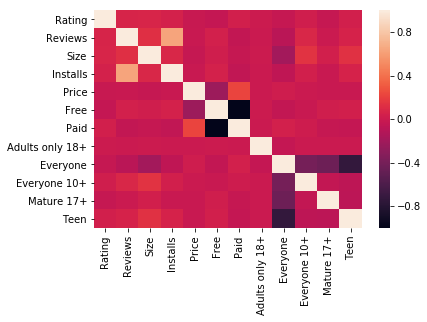

In [149]:
sns.heatmap(df_apps.corr())

In [150]:
df_apps = pd.concat([df_apps, df_genres_binarized], axis=1).drop(['Genres', 'Category'], axis=1)

In [151]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 67 columns):
App                        10357 non-null object
Rating                     10357 non-null float64
Reviews                    10357 non-null int32
Size                       10357 non-null float64
Installs                   10357 non-null int32
Price                      10357 non-null float64
Last Updated               10357 non-null datetime64[ns]
Free                       10357 non-null float64
Paid                       10357 non-null float64
Adults only 18+            10357 non-null float64
Everyone                   10357 non-null float64
Everyone 10+               10357 non-null float64
Mature 17+                 10357 non-null float64
Teen                       10357 non-null float64
Action                     10357 non-null int64
Action & Adventure         10357 non-null int64
Adventure                  10357 non-null int64
Arcade                     10357 non-null int

**Bucketizing or Binning**

Sometimes, while trying to reduce complexity in our model or analysis, we might want to bucketize some columns. Sometimes this is needed to perserve privacy.

In [158]:
df_apps.columns

Index(['App', 'Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'Free',
       'Paid', 'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Action', 'Action & Adventure', 'Adventure', 'Arcade',
       'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board',
       'Books & Reference', 'Brain Games', 'Business', 'Card', 'Casino',
       'Casual', 'Comics', 'Communication', 'Creativity', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'Music & Video', 'News & Magazines', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports',
       'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word', 'S1', 'S2', 'S

In [69]:
df_apps['Size'].describe()

count     10357.000000
mean      21287.788303
std       20813.399033
min           8.500000
25%        5700.000000
50%       17000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [155]:
 binned_size = pd.DataFrame(pd.cut(df_apps['Size'], bins=[0,20000,40000,60000,80000,100000], labels=["S1","S2","S3","S4","S5"]))

In [157]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(binned_size)
df_apps = pd.concat([df_apps,
                     pd.DataFrame(ohe.transform(binned_size), columns=ohe.categories_[0])], axis=1)\
    .drop(['Size',ohe.categories_[0][-1]], axis=1)

In [ ]:
#Exercise: Bin the Reviews column following the procedure done above.

**Making timestamps useful**

If we look at our datetime variable, Last Update we see that it's that: a timestamp. A timestamp is nothing else that a human notation for when a specific event happened. Guess what? Without proper handling, this column is not of use. We need to make it "computer" readable.

In [161]:
#Let's find the latest timestamp that we have
max_date = df_apps['Last Updated'].max()

In [168]:
#Now we can substract the amount of days from the maximum to see how old was the alst update, in days!
#Integers are numbers that we know machines can read. Spot on!
df_apps['Last Updated'] = df_apps['Last Updated'].apply(lambda x: (max_date-x).days)

In [169]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 70 columns):
App                        10357 non-null object
Rating                     10357 non-null float64
Reviews                    10357 non-null int32
Installs                   10357 non-null int32
Price                      10357 non-null float64
Last Updated               10357 non-null int64
Free                       10357 non-null float64
Paid                       10357 non-null float64
Adults only 18+            10357 non-null float64
Everyone                   10357 non-null float64
Everyone 10+               10357 non-null float64
Mature 17+                 10357 non-null float64
Teen                       10357 non-null float64
Action                     10357 non-null int64
Action & Adventure         10357 non-null int64
Adventure                  10357 non-null int64
Arcade                     10357 non-null int64
Art & Design               10357 non-null int64
Auto & V

# 6. Machine Learning Algorithms

As we see now, we have our columns ready for our Machine to read:

    dtypes: float64(13), int32(2), int64(54), object(1)
    
Only 1 Object type which is the name of our App. Let's go and test some ML algorithms on our transformed data! 

In [172]:
#Let's try to predict the Rating
y = df_apps['Rating']
X = df_apps.drop(['Rating', 'App'], axis=1)

In [248]:
#Normalizing the features
from sklearn.preprocessing import normalize
X_normalized = normalize(X)

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)

In [236]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [238]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [239]:
#We predict the results
resultslr_test = lr.predict(X_test)
resultslr_train = lr.predict(X_train)

In [240]:
comparative_df_lr = pd.DataFrame({"results":resultslr_test, "y_test":y_test})

In [241]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_lr_train = sqrt(mean_squared_error(y_train, resultslr_train))
rms_lr_test = sqrt(mean_squared_error(y_test, resultslr_test))

In [ ]:
rms_lr_train

In [242]:
rms_lr_test

0.4783401194817236

In [258]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
#We predict the results
resultsrf = rf.predict(X_test)
resultsrf_train = rf.predict(X_train)
comparative_df = pd.DataFrame({"results":resultsrf, "y_test":y_test})

In [259]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_rf_train = sqrt(mean_squared_error(y_train, resultsrf_train))
rms_rf_test = sqrt(mean_squared_error(y_test, resultsrf))

In [260]:
rms_rf_train

0.1706443236392938

In [261]:
rms_rf_test

0.44360639813179553

In [201]:
df_feature_importance = pd.DataFrame({"Feature":X_test.columns, "Feature Imp":rf.feature_importances_})

In [206]:
df_feature_importance.sort_values("Feature Imp", ascending=False).values

array([['Reviews', 0.2873355038644374],
       ['Last Updated', 0.26094577252053497],
       ['Installs', 0.08764451190122657],
       ['Price', 0.019806273179025783],
       ['S2', 0.01889869626024018],
       ['S1', 0.017904889483521487],
       ['Tools', 0.015182640604308757],
       ['Entertainment', 0.014773990396123616],
       ['Lifestyle', 0.01440024634576269],
       ['Health & Fitness', 0.013577176875205498],
       ['Finance', 0.013342471719420108],
       ['Education', 0.012465110106298388],
       ['Medical', 0.011572785804045312],
       ['Productivity', 0.010157850017469149],
       ['Business', 0.009807084934163527],
       ['S3', 0.009014959016447166],
       ['Everyone', 0.008792742505956474],
       ['Photography', 0.00811803807993703],
       ['Sports', 0.007831385933805725],
       ['Communication', 0.007281021002807118],
       ['News & Magazines', 0.007215064546994489],
       ['Dating', 0.007118524011518365],
       ['Travel & Local', 0.0071160351287969555],
   

Let's make our first Neural network!

In [264]:
from keras.layers import Dense


In [313]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(40, input_dim=68, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))

In [314]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [315]:
model.fit(X_train, y_train, epochs=100 )

Epoch 1/100
8285/8285 [==============================] - 1s 79us/step - loss: 3.3462 - mse: 3.3462
Epoch 2/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2282 - mse: 0.2282
Epoch 3/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2220 - mse: 0.2220
Epoch 4/100
8285/8285 [==============================] - 0s 57us/step - loss: 0.2202 - mse: 0.2202
Epoch 5/100
8285/8285 [==============================] - 0s 57us/step - loss: 0.2192 - mse: 0.2192
Epoch 6/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2179 - mse: 0.2179
Epoch 7/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2173 - mse: 0.2173
Epoch 8/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2173 - mse: 0.2173
Epoch 9/100
8285/8285 [==============================] - 0s 58us/step - loss: 0.2159 - mse: 0.2159
Epoch 10/100
8285/8285 [==============================] - 0s 57us/step - loss: 0.2161 - mse: 0.2161
Epoch 11/

8285/8285 [==============================] - 0s 57us/step - loss: 0.2112 - mse: 0.2112
Epoch 84/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2112 - mse: 0.2112
Epoch 85/100
8285/8285 [==============================] - 0s 57us/step - loss: 0.2110 - mse: 0.2110
Epoch 86/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2116 - mse: 0.2116
Epoch 87/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2111 - mse: 0.2111
Epoch 88/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2108 - mse: 0.2108
Epoch 89/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2104 - mse: 0.2104
Epoch 90/100
8285/8285 [==============================] - 0s 54us/step - loss: 0.2104 - mse: 0.2104
Epoch 91/100
8285/8285 [==============================] - 0s 56us/step - loss: 0.2104 - mse: 0.2104
Epoch 92/100
8285/8285 [==============================] - 0s 55us/step - loss: 0.2095 - mse: 0.2095
Epoch 93/100


In [316]:
results_keras_test = model.predict(X_test)
results_keras_train = model.predict(X_train)
#comparative_df_keras = pd.DataFrame({"results":result_keras_test, "y_test":y_test})


In [317]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_keras_train = sqrt(mean_squared_error(y_train, results_keras_train))
rms_keras_test = sqrt(mean_squared_error(y_test, results_keras_test))

In [318]:
rms_keras_train

0.4644834366979156

In [319]:
rms_keras_test

0.4613515037643093